# Make sure you are in the correct directory, then load these two

In [1]:
# Here I am assuming I am one deep from the root directory.
include("../juliaCode/Initial.jl")
include("../juliaCode/Symplectic.jl")

reverseCommands (generic function with 1 method)

In [2]:
using Conda


### If we want to draw circuits, we need the following:

- This requires various packages to be installed PyPlot, PyCall

- You no longer need SymPy, however for future reference if you want to install packages that are available where you use the Julia python environment, the easiest way is probably to use the Julia version of Conda, then its simply
        using Conda
        Conda.add("sympy")



In [3]:
include("../juliaCode/plotCircuits.jl")

plotIt (generic function with 1 method)

# Sample use

## Stabiliser Circuits

>    state = setup(number_ofQubits)

prepares the stabiliser state for the correct number of qubits in the |000..000> basis state

The state is represented internally as a matrix of the form:

![Matrix](figures/Matrix.png)
[Aaronson/Gottesman arXiv:quant-ph/0406196](https://arxiv.org/abs/quant-ph/0406196)

Currently I am just using Int32 Arrays, although binary arrays would save space (if it ever becomes necessary).
Rows 1 to n of the tableau represent the destabiliser generators, rows n+1 to 2n represent the stabiliser generators. Each row is read
as follows: if the x<sub>ij</sub> and z<sub>ij</sub> are 1, the de/stabiliser is a Y, if they are both 0, its I otherwise its an X or Z depending on which one is set.
 
>    output(state)

Prints the state in a human readable form. The states above the line are the 'destabiliser' state, below the line are the 'stabiliser' states. 

So in a 3 qubit system the initial state of |000> is coded as 

```
XII
IXI
IIX
---
ZII
IZI
IIZ
```

If the state |000> is multiplied by any row 'above' the line we get a 1, any row below the line it is zero.

The following commands are defined

>    hadamard(state,qubit)  # apply a hadamard to the relevant qubit

>    phase(state,qubit)     # apply a phase gate to the relevant qubit

>    cnot(state,control,target) # apply a controlled not from control qubit to target qubit

Output of the resultant state can be supressed by adding an extra false parameter

>    hadamard(state,qubit,false) # hadamard as before, but supress output

There are also ! versions e.g. 
>    hadamard!(qubit) 

which act on the globally defined state. You can use this to simulate clifford circuits, or if you have a stabilized state it can be decomposed to provide the circuit that can be used to create the state. This can be used with the mapping (below) to construct Clifford gates for a large number of qubits.



I will briefly discuss the 'symplectic' mapping between numbers and Cliffords. More details in: Koenig/Smolin arXiv:quant-ph/1406.2170
[Koenig/Smolin arXiv:quant-ph/1406.2170](https://arxiv.org/abs/1406.2170)

The easiest way to get a stabilised state that represents the actions of a Clifford on the start state is to use the symplectic command.
This is a one-one mapping between the integers and the cliffords
For each 'symplectic' the X, and Z maps can be +1 or -1 which means
There are an additional 2^d*2^d cliffords 'per' symplectic, in the stabilizer formalism this is the $r_1\ldots r_{2n}$ of the matrix above

- So symplectic(62345,7) gives you the mapping for 7 qubit, symplectic 62345
- then stabiliseSymp(X,28), gives you the stabilised version of X, with the bit pattern 28 (converted to binary)
- maybe easiest to see in the one qubit system.
- here remember there are 24 cliffords, being $6$ $\times$ ($2\times2$)



In [4]:
symp=symplectic(1,1) # get the first symplectic of a 1 qubit system.

2×2 Array{Int64,2}:
 0  1
 1  0

In [5]:
output(stabiliseSymp(symp,0)) # stabilise it with the bit string 0 (i.e. +X, +Z)

+Z
--
+X


In [6]:
output(stabiliseSymp(symp,1)) # stabilise it with the bit string 1

-Z
--
+X


In [7]:
output(stabiliseSymp(symp,2)) # and so on
print("==========\n")
output(stabiliseSymp(symp,3)) 

+Z
--
-X
-Z
--
-X


In [8]:
state = stabiliseSymp(symp,3)

2×3 Array{Int32,2}:
 0  1  1
 1  0  1

In [9]:
# Break it down in the computation basis. 
# We use this more extensively looking at the Gottesman code
getStates()

+|0>
-|1>


In [10]:
# A quick example
state = stabiliseSymp(symplectic(3,2),3)
output(state)

-IX
-XI
---
+XZ
+ZX


In [11]:
getStates()

+|00>
+|10>
+|01>
-|11>


In [12]:
hadamard!(1)

-IX
-ZI
---
+ZZ
+XX


In [13]:
getStates()

+|00>
+|11>


In [14]:
decompose(3,0,2,false,true)

Tableau for unitary: 
+IX
+XI
---
+XZ
+ZX
setup(2)
cnot(2,1)
phase(1)
phase(1)
phase(1)
cnot(2,1)
phase(2)
phase(1)
hadamard(2)
hadamard(1)
cnot(2,1)
phase(1)
phase(1)
phase(1)
cnot(2,1)
phase(2)
phase(1)
output(state)


There are two methods (currently) of simply plotting this.

- plotIt() just does a direct draw of the circuit using the code in PlotQCircuit (attributions in code of the file
- scheduleIt() uses [x]'s scheduler to just put gates which can run simultaneously on the same line

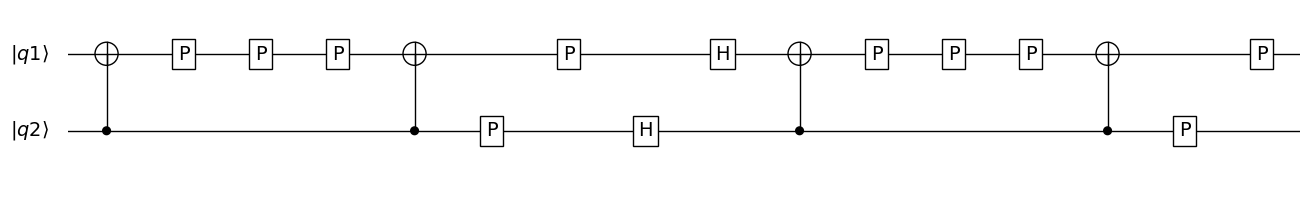

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x12da02a20>

In [15]:
plotIt()

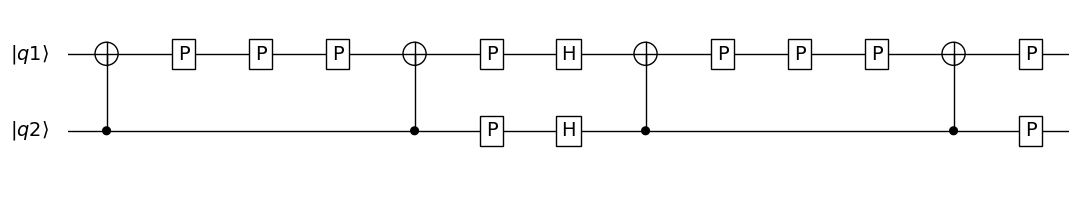

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x12da022e8>

In [16]:
scheduleIt()

Note that it wraps

In [17]:
for i in 1:7
    print("\n==========\n")
    print(symplectic(i,1))
end


[0 1; 1 0]
[1 1; 1 0]
[1 0; 1 1]
[0 1; 1 1]
[1 1; 0 1]
[1 0; 0 1]
[0 1; 1 0]

## Lets do something more fun, move up to 7 qubits

In [18]:
state=stabiliseSymp(symplectic(62345,7),231) 


14×15 Array{Int32,2}:
 1  1  0  0  1  0  1  0  1  0  1  1  0  1  1
 1  0  0  0  1  0  1  0  0  0  1  1  0  1  1
 0  0  1  0  0  0  0  0  0  0  0  0  0  0  1
 0  1  0  1  1  0  1  1  1  0  1  1  0  1  0
 0  1  0  0  0  0  1  1  1  0  1  1  0  1  0
 0  0  0  0  0  1  0  0  0  0  0  0  0  0  1
 0  1  0  0  1  0  0  1  1  0  1  1  0  1  1
 0  1  0  0  1  0  1  0  0  0  1  1  0  1  1
 0  1  0  0  1  0  1  1  0  0  1  1  0  1  0
 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
 0  1  0  0  1  0  1  1  1  0  1  0  0  1  0
 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
 0  1  0  0  1  0  1  1  1  0  1  1  0  0  0

## The raw state isnt very readable, output splits it into stabilizers (bottom) and anti-stabilisers (top)

In [19]:
output(state)

-XYIZYIY
-XIIZYIY
-IIXIIII
+ZYIYYIY
+ZYIZZIY
-IIIIIXI
-ZYIZYIZ
--------
-IXIZYIY
+ZXIZYIY
+IIZIIII
+IIIZIII
+ZYIZXIY
+IIIIIZI
+ZYIZYIX


## We can decompose it into one/two qubit component gates

In [20]:
decomposeState(state)

Tableau for unitary: 
-XYIZYIY
-XIIZYIY
-IIXIIII
+ZYIYYIY
+ZYIZZIY
-IIIIIXI
-ZYIZYIZ
--------
-IXIZYIY
+ZXIZYIY
+IIZIIII
+IIIZIII
+ZYIZXIY
+IIIIIZI
+ZYIZYIX
setup(7)
cnot(7,5)
cnot(7,4)
cnot(7,2)
cnot(2,1)
phase(7)
phase(7)
phase(4)
phase(4)
phase(7)
phase(6)
phase(5)
phase(4)
phase(3)
phase(2)
phase(1)
cnot(7,5)
cnot(7,4)
cnot(7,2)
phase(2)
cnot(7,1)
cnot(2,1)
phase(7)
phase(6)
phase(5)
phase(4)
phase(3)
phase(2)
hadamard(7)
hadamard(5)
hadamard(4)
hadamard(2)
hadamard(1)
cnot(7,5)
cnot(7,2)
cnot(7,1)
phase(5)
phase(5)
phase(2)
phase(2)
phase(7)
phase(5)
phase(2)
phase(1)
phase(7)
cnot(7,5)
cnot(7,2)
cnot(7,1)
phase(7)
phase(5)
phase(2)
phase(1)
cnot(7,5)
cnot(7,4)
cnot(7,1)
cnot(5,4)
cnot(5,1)
cnot(4,7)
cnot(4,5)
cnot(4,1)
cnot(5,4)
cnot(2,7)
cnot(2,5)
cnot(2,4)
cnot(4,2)
cnot(1,7)
cnot(1,5)
cnot(1,4)
cnot(4,1)
hadamard(5)
hadamard(4)
hadamard(2)
hadamard(1)
output(state)


In [21]:
decompose(62345,212,7,false,false) # This is the same thing, just all combined
print("$(length(commands))")

Tableau for unitary: 
+XYIZYIY
+XIIZYIY
-IIXIIII
+ZYIYYIY
-ZYIZZIY
+IIIIIXI
-ZYIZYIZ
--------
-IXIZYIY
+ZXIZYIY
+IIZIIII
+IIIZIII
+ZYIZXIY
+IIIIIZI
+ZYIZYIX
setup(7)
cnot(7,5)
cnot(7,4)
cnot(7,2)
cnot(2,1)
phase(7)
phase(7)
phase(6)
phase(6)
phase(5)
phase(5)
phase(4)
phase(4)
phase(1)
phase(1)
phase(7)
phase(6)
phase(5)
phase(4)
phase(3)
phase(2)
phase(1)
cnot(7,5)
cnot(7,4)
cnot(7,2)
phase(2)
cnot(7,1)
cnot(2,1)
phase(7)
phase(6)
phase(5)
phase(4)
phase(3)
phase(2)
hadamard(7)
hadamard(6)
hadamard(5)
hadamard(4)
hadamard(3)
hadamard(2)
hadamard(1)
cnot(7,5)
cnot(7,2)
cnot(7,1)
phase(6)
phase(6)
phase(5)
phase(5)
phase(4)
phase(4)
phase(3)
phase(3)
phase(2)
phase(2)
phase(7)
phase(6)
phase(5)
phase(4)
phase(3)
phase(2)
phase(1)
phase(7)
cnot(7,5)
cnot(7,2)
cnot(7,1)
phase(7)
phase(6)
phase(5)
phase(4)
phase(3)
phase(2)
phase(1)
cnot(7,5)
cnot(7,4)
cnot(7,1)
cnot(5,4)
cnot(5,1)
cnot(4,7)
cnot(4,5)
cnot(4,1)
cnot(5,4)
cnot(2,7)
cnot(2,5)
cnot(2,4)
cnot(4,2)
cnot(1,7)
cnot(1,5)
cnot(1,4)

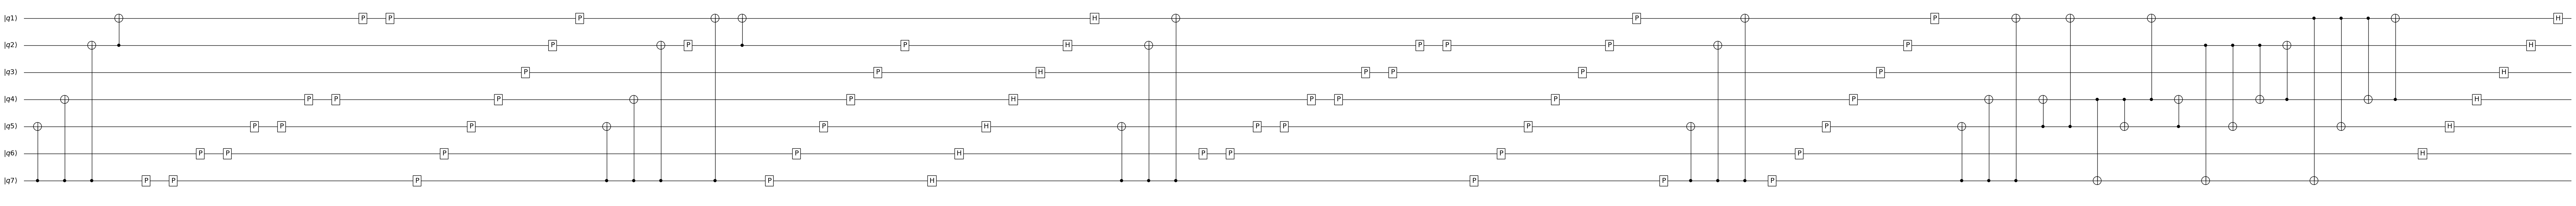

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x137a81a58>

In [22]:
plotIt()

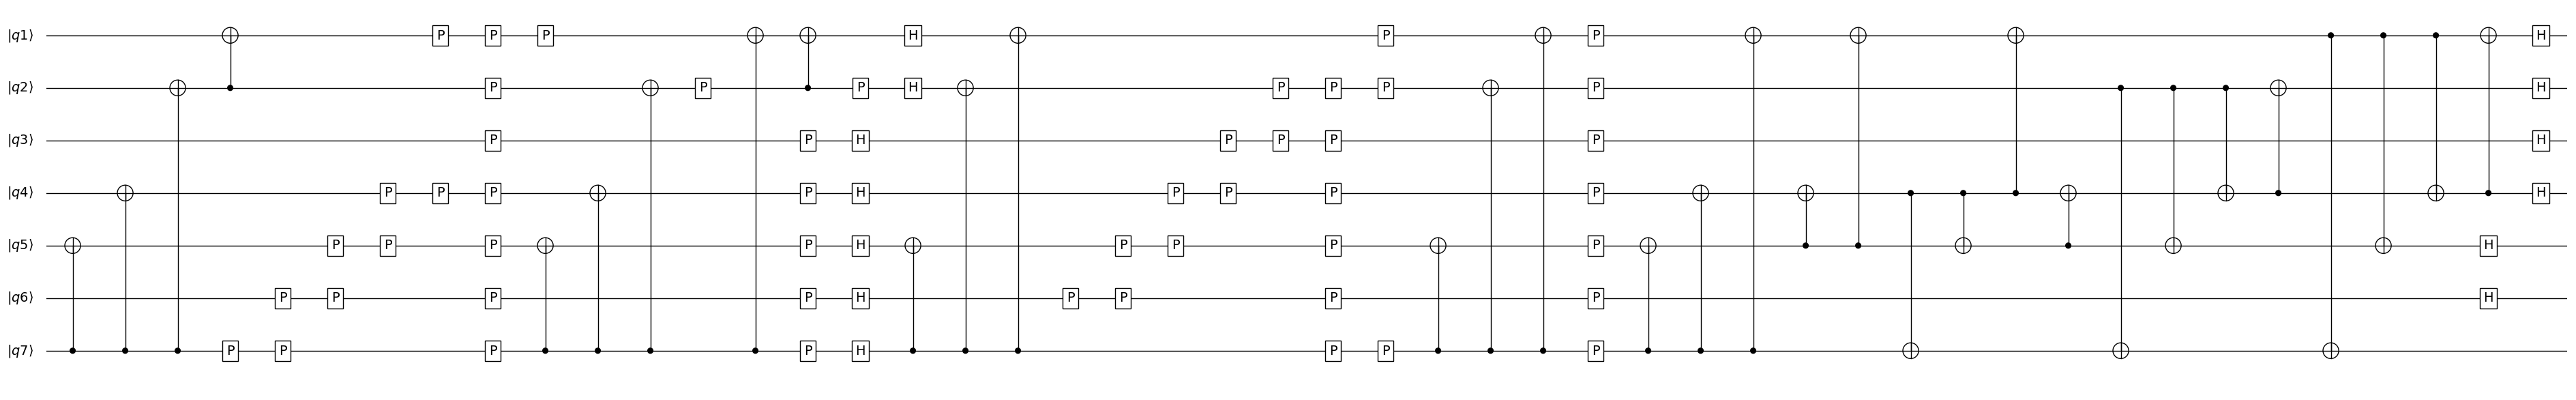

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x13967f7b8>

In [23]:
scheduleIt()

You can also get the QASM commands if you want to use the QASM package to generate latex code.

In [24]:
# You used to be able - todo provide command for this.
print(drawCircuit())

(Any[("CNOT", "q5", "q7"), ("CNOT", "q4", "q7"), ("CNOT", "q2", "q7"), ("CNOT", "q1", "q2"), ("P", "q7"), ("P", "q7"), ("P", "q6"), ("P", "q6"), ("P", "q5"), ("P", "q5"), ("P", "q4"), ("P", "q4"), ("P", "q1"), ("P", "q1"), ("P", "q7"), ("P", "q6"), ("P", "q5"), ("P", "q4"), ("P", "q3"), ("P", "q2"), ("P", "q1"), ("CNOT", "q5", "q7"), ("CNOT", "q4", "q7"), ("CNOT", "q2", "q7"), ("P", "q2"), ("CNOT", "q1", "q7"), ("CNOT", "q1", "q2"), ("P", "q7"), ("P", "q6"), ("P", "q5"), ("P", "q4"), ("P", "q3"), ("P", "q2"), ("H", "q7"), ("H", "q6"), ("H", "q5"), ("H", "q4"), ("H", "q3"), ("H", "q2"), ("H", "q1"), ("CNOT", "q5", "q7"), ("CNOT", "q2", "q7"), ("CNOT", "q1", "q7"), ("P", "q6"), ("P", "q6"), ("P", "q5"), ("P", "q5"), ("P", "q4"), ("P", "q4"), ("P", "q3"), ("P", "q3"), ("P", "q2"), ("P", "q2"), ("P", "q7"), ("P", "q6"), ("P", "q5"), ("P", "q4"), ("P", "q3"), ("P", "q2"), ("P", "q1"), ("P", "q7"), ("CNOT", "q5", "q7"), ("CNOT", "q2", "q7"), ("CNOT", "q1", "q7"), ("P", "q7"), ("P", "q6"), ("

In [25]:
commands # This is the global containing the gates that make it up


96-element Array{String,1}:
 "setup(7)"     
 "cnot(7,5)"    
 "cnot(7,4)"    
 "cnot(7,2)"    
 "cnot(2,1)"    
 "phase(7)"     
 "phase(7)"     
 "phase(6)"     
 "phase(6)"     
 "phase(5)"     
 "phase(5)"     
 "phase(4)"     
 "phase(4)"     
 ⋮              
 "cnot(4,2)"    
 "cnot(1,7)"    
 "cnot(1,5)"    
 "cnot(1,4)"    
 "cnot(4,1)"    
 "hadamard(6)"  
 "hadamard(5)"  
 "hadamard(4)"  
 "hadamard(3)"  
 "hadamard(2)"  
 "hadamard(1)"  
 "output(state)"

## Here we have specified not to do any minimisation (e.g. two hadamards cancel), but we can in general shorten it

In [26]:
decompose(62345,212,7) # Without the second false, we will try and rationalise a bit
print("$(length(commands))")

Tableau for unitary: 
+XYIZYIY
+XIIZYIY
-IIXIIII
+ZYIYYIY
-ZYIZZIY
+IIIIIXI
-ZYIZYIZ
--------
-IXIZYIY
+ZXIZYIY
+IIZIIII
+IIIZIII
+ZYIZXIY
+IIIIIZI
+ZYIZYIX
setup(7)
cnot(7,5)
cnot(7,4)
cnot(7,2)
cnot(2,1)
phase(7)
phase(7)
phase(5)
phase(5)
phase(4)
phase(4)
phase(1)
phase(1)
phase(7)
phase(5)
phase(4)
phase(3)
phase(2)
phase(1)
cnot(7,5)
cnot(7,4)
cnot(7,2)
phase(2)
cnot(7,1)
cnot(2,1)
phase(7)
phase(5)
phase(4)
phase(3)
phase(2)
hadamard(7)
hadamard(5)
hadamard(4)
hadamard(2)
hadamard(1)
cnot(7,5)
cnot(7,2)
cnot(7,1)
phase(5)
phase(5)
phase(2)
phase(2)
phase(7)
phase(5)
phase(2)
phase(1)
phase(7)
cnot(7,5)
cnot(7,2)
cnot(7,1)
phase(7)
phase(5)
phase(2)
phase(1)
cnot(7,5)
cnot(7,4)
cnot(7,1)
cnot(5,4)
cnot(5,1)
cnot(4,7)
cnot(4,5)
cnot(4,1)
cnot(5,4)
cnot(2,7)
cnot(2,5)
cnot(2,4)
cnot(4,2)
cnot(1,7)
cnot(1,5)
cnot(1,4)
cnot(4,1)
hadamard(5)
hadamard(4)
hadamard(2)
hadamard(1)
output(state)
76

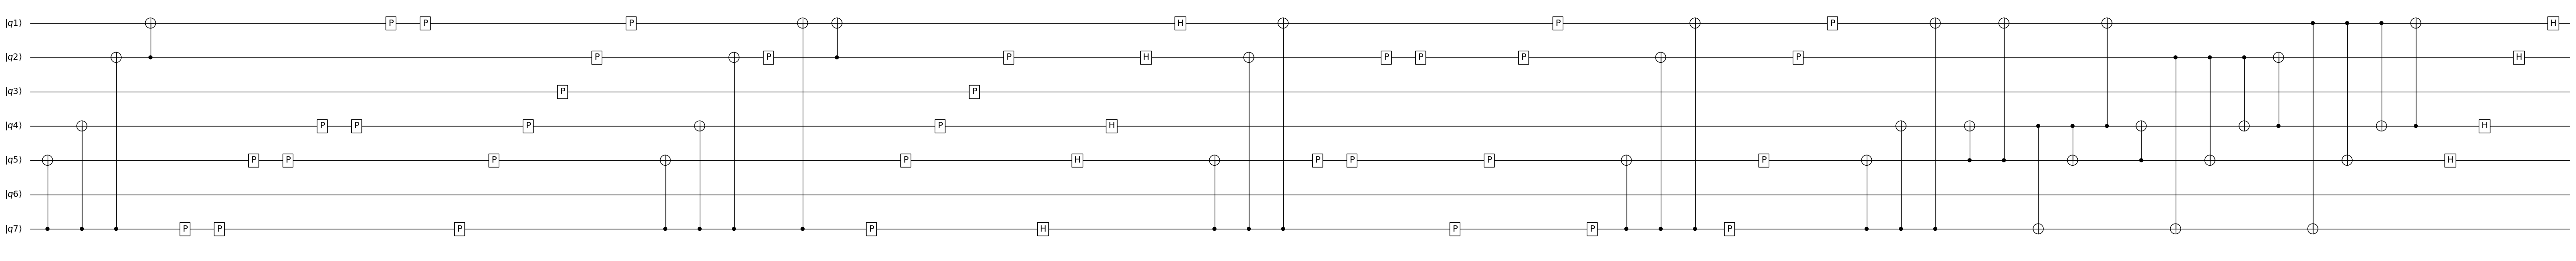

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x139684cc0>

In [27]:
plotIt() # a little bit shorter

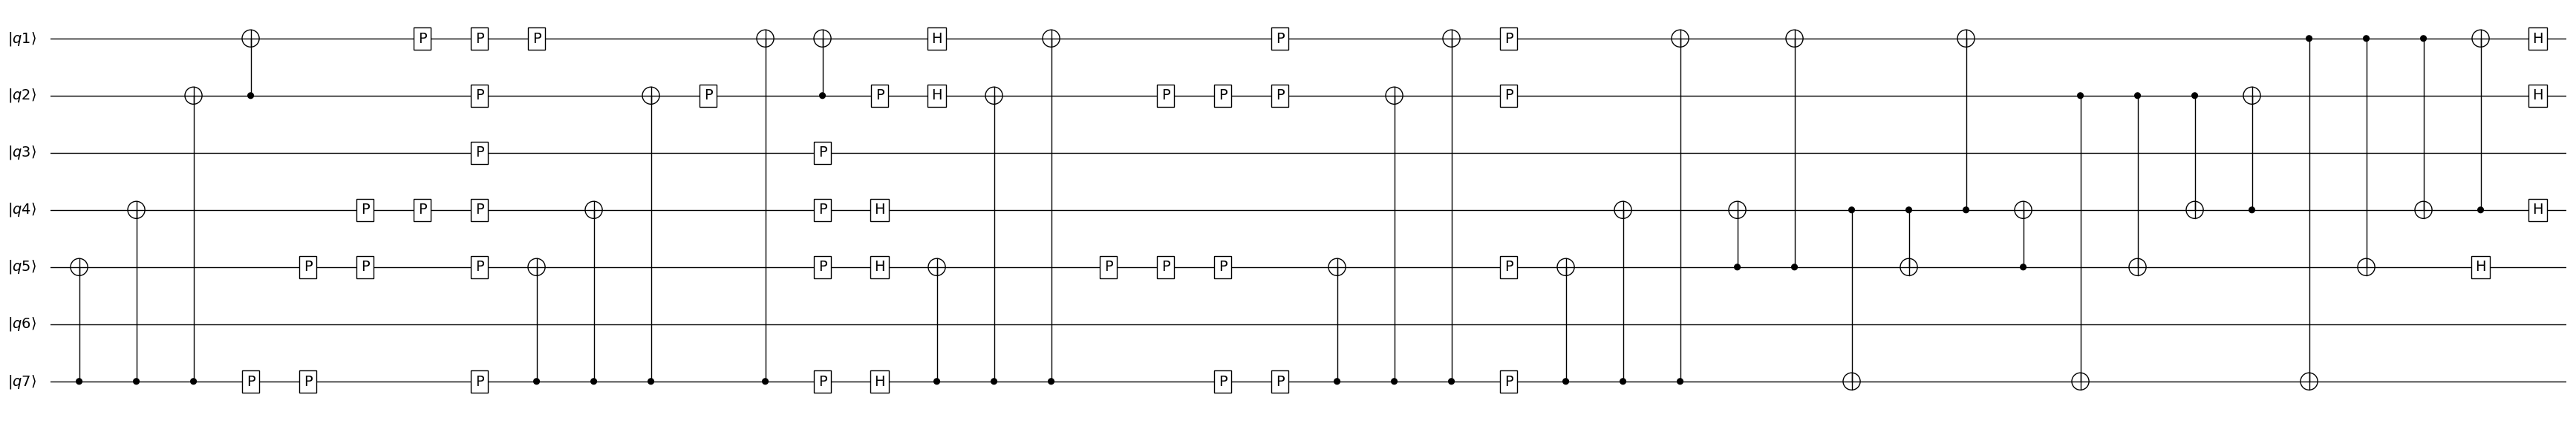

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x13d3ee8d0>

In [28]:
scheduleIt()

## And with 3 qubits

In [29]:
state=setup(3)
state=stabiliseSymp(symplectic(56,3),9)

6×7 Array{Int32,2}:
 1  0  1  0  1  1  1
 0  1  1  1  1  1  0
 0  0  0  1  1  1  0
 1  0  1  1  1  1  1
 0  0  0  0  1  0  0
 0  0  1  1  1  0  0

In [30]:
# Specifying true here keeps it quiet!
decompose(56,9,3,true)

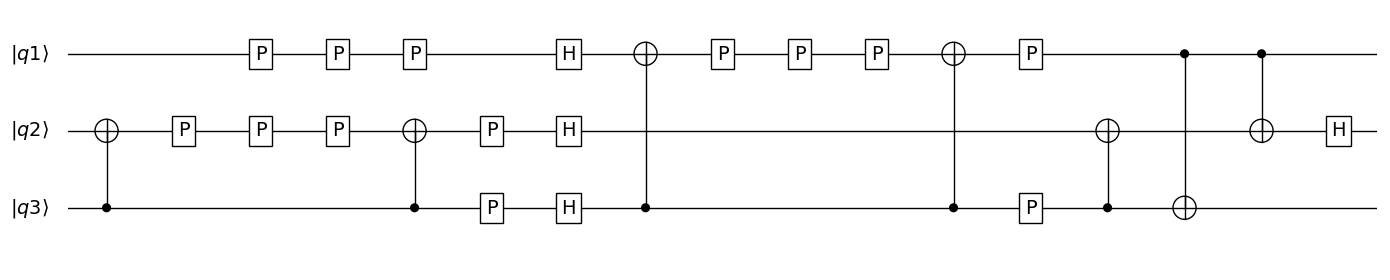

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x137b12828>

In [31]:
scheduleIt()